<h1><center><strong><font color="chillipepper">Lab Session 1: An Introduction to Textual Data</font></strong></center></h1>
<h3><center><font color="green"><strong>Correction</strong></font></center></h3>


------------------------

# Overview

Before machine learning algorithms, NLP is all about data: data types, data distribution, data preparation, data representation.

## Course takeaways

- The Why of NLP
- What is NLP ? the four challenges of NLP
- NLP in two pipelines
- Data exploration and preparation

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

## Lab session in a nutshell 

- First step with a textual dataset 
- Basic Tokenization (Word Segmentation) of a dataset 
- Compute Vocabulary and Zipf's law
- Introduction to Regex 
- A basic comparison of two datasets
- Hands on some processing tools (POS, NER, parsing) 
- A glimpse of topic models 

## Resources: 

- NLTK: https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- SPACY: https://spacy.io/usage/spacy-101 

## Databases: 

We will use the following databases:
1. [BBC News Classification dataset](https://www.kaggle.com/c/learn-ai-bbc/overview): a corpus that we will download from our gitlab (so you don't have to register to kaggle) and extract manually
2. [Amazon Review dataset](https://huggingface.co/datasets/amazon_reviews_multi): a multilingual corpus that we will retrieve from the [Datasets](https://huggingface.co/datasets) library

## Tasks

### 1. Basic preprocessing
1.1 Open the database. Generate simple statistics about the articles. How many unique articles are there? What is the mean length of articles (considering characters)? 

1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
2.1 Split the articles into list of words. How many different words are there in the vocabulary? 

2.2 Split the articles into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

2.3 Check if Zipf's law applies. 

### 3. Domain specificity and regex
3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 

3.2 How many percent of characters are numbers (as defined above) in a given article? 

3.3 Is there any relationship between the percentage of numbers in an article and the content length? 

### 4. Dataset Comparison
Merge datasets and compare some basic statistics

### 5. Classic NLP pipeline
5.0 Re-tokenize using spacy

5.1 Lemmatize using spacy

5.2 POS tagging using spacy, plot the trees

5.3 NER using spacy, give the amount of each entity type for a given title, and compare it to the title length. 

### 6. Topic Modelling
6.1 Use Gensim's LDA to compute a topic model. 

6.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?


# <font color="chillipepper">**Imports and Installation**</font>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
     |█████████████▍                  | 12.6 MB 45 kB/s eta 0:06:325

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored


# <font color="chillipepper">**Data Basic Exploration**</font>

We first start by opening the database and load it as a **Pandas dataframe**.

Documentation:
- https://pandas.pydata.org/docs/

In [ ]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Our dataframe have the following columns:

In [ ]:
df.columns

### 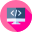 **TODO!** Print the number of different articles in the database.

Tip: You may need the `.unique()` function of Pandas.

In [ ]:
# Number of different articles in the database
print(len(df.filename.unique()))

### 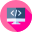 **TODO!** print the mean length (*i.e.* number of characters) of the `content` column

Tip: You may need the `.mean()` function of Pandas.

In [ ]:
# Mean length of content in characters
df.content.drop_duplicates().apply(len).mean()

### 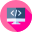 **TODO!** display the different article categories as a list

In [ ]:
# display the different article categories
df.category.drop_duplicates().tolist()

### 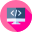 **TODO!** Display the repartition of the content lengths (characters) as an histogram.

Tip: See the `.hist()` function of Pandas.

In [ ]:
# Repartition of the content lengths (characters)
%matplotlib inline
df.content.drop_duplicates().apply(len).hist(bins=40)

### 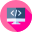 **TODO!** display the number of articles per `category`.

Tip: You may need the `.groupby()` function of Pandas.

In [ ]:
# We check the number of article per category
df.drop_duplicates().groupby(df.category).size()

### 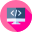 **TODO!** Display the histogram of the number of articles per category

In [ ]:
# And plot a histogram
df.drop_duplicates().groupby(df.category).size().hist()

### 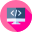 **TODO!** Let's add some basic information about the text: number of "words". Put them into new `title_len` and `content_len` columns. 

Tip: just split the text according to the spaces

In [ ]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['title_len'] = df.title.apply(lambda x: len(x.split(' ')) )
df['content_len'] = df.content.apply(lambda x: len(x.split(' ')) )

Here you can see how to display a `ProfileReport()` from PandasProfiling.

Play with it and explore the interactive report.

In [ ]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

### 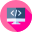 **TODO!** print the standard deviation for each article's title length `title_len` and content length `content_len`.

Tip: you may need the `.std()` function from Pandas

In [ ]:
eval_cols = ["title_len", 'content_len']
df.groupby(df.filename)[eval_cols].std()

### 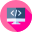 **TODO!** Complete the following code with your solution from previous TODO. This will display the plots for standard deviation distribution of `title_len` and `content_len`.

In [ ]:
import matplotlib.pyplot as plt

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  df.groupby(df.filename)[col].std().hist()
  plt.plot()

# <font color="chillipepper">**Word-level Preprocessing**</font>

### 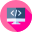 **TODO!** Split the abstracts into list of words. How many different words are there in the vocabulary?

In [ ]:
# List of words with separator = " "
arr = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array

# Now we flatten the list of lists into a single level list. Multiple ways:
# I personaly do prefer the list comprehension for efficiency reasons
arr = [ x for X in arr for x in X]
# But some prefer the reduce one
# arr = reduce(add, arr) # Concatenates all lists contained in arr
# Which is equivalent to :
# arr2 = []
# for a in arr:
#   arr2 = arr2 + a
# arr = arr2
print(arr[:5])
print('%s "words" in the contents' % (len(set(arr)) ) )
# the set object transforms a list to the set of unique elements in the list


In [ ]:
arr = df.title.drop_duplicates().apply(lambda x: x.split(' ')).array
arr = [ x for X in arr for x in X]
print(arr[:5])
print( '%s "words" in the titles' % (len(set(arr))) )

### 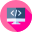 **TODO!** Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

If you look at the first 30 tokens, the `TweetTokenizer` is the only one to separate "bn" from "1.13" in "1.13bn".

### 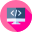 **TODO!** Check if Zipf's law applies.

Complete the following code.

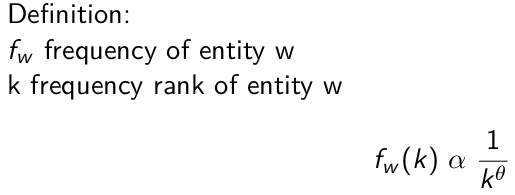

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tqdm(tokenizers):
  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

# <font color="chillipepper">**Domain specificity and regex**</font>


### 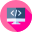 **TODO!** Use regex to retrieve numbers (ints, floats, %, years, ...) in article contents.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [ ]:
# See an example of a full article content:
print(df.content.iloc[0])

In [ ]:
import re
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099. # 1[89][0-9][0-9]|20[0-9][0-9]
df1 = df.drop_duplicates('content')  # Don't forget to compute over unique elements if it applies
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
df1[nb_types].head()

### 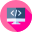 **TODO!** How many percent of characters are numbers (as defined above) in a given article?


In [ ]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# Don't forget to compute over unique abstracts
df1 = df.drop_duplicates('content')

for prog, nb_type in zip(progs, nb_percent_types):
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
df1[nb_percent_types+['content']].head()

In [ ]:
df1[nb_percent_types].hist()

Compute these histograms for each category.

In [ ]:
categories = list(df.category.drop_duplicates().values)
for category in categories:
  # filter by category
  is_category = df['category']==category
  df1 = df[is_category]
  
  nb_percent_types = [''.join([t, '%']) for t in nb_types]

  for prog, nb_type in zip(progs, nb_percent_types):
    df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
  # df1[nb_percent_types+['content']].head()

  # df1[nb_percent_types].hist()
  ax = df1[nb_percent_types].plot(kind='hist',subplots=False,sharex=True,sharey=True,title='%s' % (category))


### 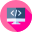 **TODO!** Is there any relationship between the percentage of numbers in an article and the content length?

Here is a way to apply custom explorations. Of course, you could also add a dedicated column and simply run again pandas profiling for a `ProfileReport(df)`

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_content_len'] = np.log(df1['content_len'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_content_len', y=nb_type)
    #pass
  else:
    sns.jointplot(data=df1, kind='kde', x='log_content_len', y=nb_type)#annotate(pearsonr)#
    plt.show()
  

# <font color="chillipepper">**Multiple Dataset Comparison**</font>

Let's download the second dataset.

Now we transform the Hugging Face's `Dataset` object into a Pandas dataframe and retrieve the desired languages to reduce the size.

### 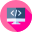 **TODO!** select only the english reviews.

In [ ]:
amazon_df = pd.read_csv('amazon/train.csv',index_col=0)
is_fr_or_en = (amazon_df['language']=='fr') | (amazon_df['language']=='en') 
amazon_df = amazon_df[is_fr_or_en]
amazon_df

## Compare BBC News and Amazon Reviews datasets (English only)

In [ ]:
amazon_df_en = amazon_df[ amazon_df['language']=='en' ]

In [ ]:
# let's save some RAM
del amazon_df

### 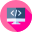 **TODO!** Compare the number of article per category in BBCNews and Amazon

In [ ]:
# number of article per category
print( dict(df.drop_duplicates().groupby(df.category).size()) )
print( dict(amazon_df_en.drop_duplicates().groupby(amazon_df_en.product_category).size()) )

### 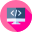 **TODO!** Compare the mean number of character per article content and title for both BBC News and Amazon

In [ ]:
# mean content length (characters)
print('Mean number of character per element')
print( colored('BBCNews', 'blue'), df.content.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'),  amazon_df_en.review_body.drop_duplicates().apply(len).mean())

In [ ]:
# mean title length (characters)
print('Mean number of character per title')
print( colored('BBCNews', 'blue'), df.title.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'), amazon_df_en.review_title.drop_duplicates().apply(lambda x: len(str(x))).mean())

### 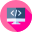 **TODO!** Concatenate both dataframes into one, with the following mapping.

In [ ]:
columns_to_keep = ['review_id', 'review_body', 'review_title', 'product_category']
columns_newnames = {'review_id':'filename','review_body':'content','review_title':'title', 'product_category':'category'}
bbcamazon = pd.concat([df,amazon_df_en[columns_to_keep].rename(columns=columns_newnames)], ignore_index=True)

In [ ]:
bbcamazon

In [ ]:
# let's save some RAM
del df
del amazon_df_en

### 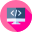 **TODO!** Add columns `content_len` and `title_len` dedicated to store the content length from better tokenized text 

Tip: use `TweetTokenizer()` from nltk and `.apply()` function from Pandas

In [ ]:
from nltk.tokenize import TweetTokenizer

# Apply the tokenizer to the text and create a column dedicated to it. Same goes for the title.
tokenizer = TweetTokenizer()
bbcamazon['content_tokenized'] = bbcamazon.content.apply(lambda x: tokenizer.tokenize(x))
bbcamazon['title_tokenized'] = bbcamazon.title.apply(lambda x: tokenizer.tokenize(str(x)))

In [ ]:
# Replace text len using the tokenized values
bbcamazon['content_len_tokenized'] = bbcamazon.content_tokenized.apply(lambda x: len(x))
bbcamazon['title_len_tokenized'] = bbcamazon.title_tokenized.apply(lambda x: len(x))

In [ ]:
# Recalculate the title_len and content_len for all elements
bbcamazon['content_len'] = bbcamazon.content.apply(lambda x: len(x.split(' ')))
bbcamazon['title_len'] = bbcamazon.title.apply(lambda x: len(x.split(' ')))

### 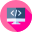 **TODO!** Add a `source` column specifying whether an article is from Amazon or BBC News

In [ ]:
# Let's add an indication about the source using the filename type
bbcamazon['source'] = bbcamazon.filename.apply(lambda x: 'bbcnews' if '.txt' in x else 'amazon')

Now let's have a glimpse of our concatenated and enriched data.

In [ ]:
bbcamazon.head()

Can you see the difference? A good tokenization can take into account several factors such as contractions: `I'm` should become `I am`. Hence, `content_len_tokenized` should almost always be higher than `content_len`.

### 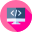 **TODO!** Check Zipf's law for BBC News and Amazon Reviews.

In [ ]:
sources = bbcamazon.source.drop_duplicates().tolist()
sources

In [ ]:
for source in sources:
  arr = bbcamazon[bbcamazon['source']==source].content_tokenized.array
  arr = [ x for X in arr for x in X] 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Source: {0}".format(source))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

### 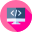 **TODO!** Create a report of the concatenated dataframe

Tip: to save some RAM, create a mini dataframe ignoring text columns such as `content_tokenized`

Now let's create a report again. As our dataset is bigger, the iframe creation should take too much time. Let's use a version without the tokenized content and tokenized title.

In [ ]:
# We remove the text columns because generating the iframe takes a lot of time and RAM
mini_bbcamazon = bbcamazon.drop(columns=['content_tokenized', 'title_tokenized', 'content', 'title'])

In [ ]:
# Let's create an automatic and interactive report of the BBCAmazon dataframe
profile = ProfileReport(mini_bbcamazon, title="BBC News x Amazon", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

Take a look at the correlations, which correlation metric is the best one to differenciate the different content and title lengths?

The Kendall's correlation shows a slight difference between content tokenized and not tokenized based on their lengths.

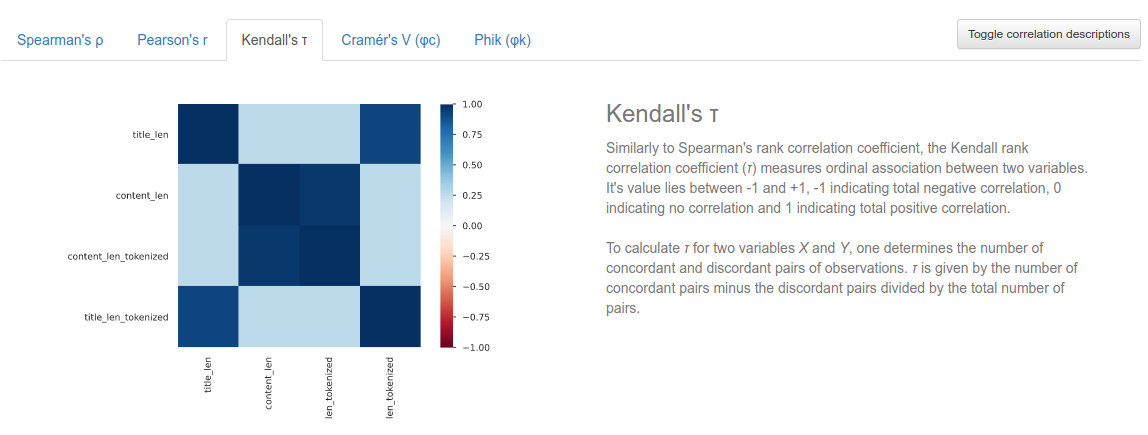

In [ ]:
# let's save some RAM
del mini_bbcamazon


# <font color="chillipepper">**Classic NLP pipeline**</font>

Here you can see a classic NLP pipeline applied on titles from BBC News (in order to gain some time).

Don't hesitate to change to scope afterwards: apply it on content from BBC News for instance.


### 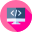 **TODO!** Re-tokenize using spacy

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count
arr = bbcamazon[bbcamazon.source=='bbcnews'].title.apply(lambda x: [w.text for w in tokenizer(x)]).array
arr = [ x for X in arr for x in X]
print("Vocabulary size with Spacy's tokenizer: {}".format(len(set(arr))))

# Inspecting a tokenization sample
tokenization_sample = bbcamazon[bbcamazon.source=='bbcnews'].title.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))

The tokenizer doesn't seem to do better than nltk's tokenizers, in terms of vocabulary size.



# <font color="chillipepper">**Topic Modelling**</font>

In this part you don't need to do anything. Just analyze the following code as an example given to you.


### Use Gensim's LDA to compute a topic model. 


In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(bbcamazon[bbcamazon.source=='bbcnews'].content.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

### Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.